In [1]:
import learn
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

Valeurs manquantes dans KitchenQual après conversion : 1
     Id  LotArea  OverallQual  OverallCond  YearRemodAdd  GrLivArea  FullBath  \
0  1461    11622            5            6          1961        896         1   
1  1462    14267            6            6          1958       1329         1   
2  1463    13830            5            5          1998       1629         2   
3  1464     9978            6            6          1998       1604         2   
4  1465     5005            8            5          1992       1280         2   

   BedroomAbvGr  KitchenQual  GarageCars  GarageArea  MoSold      SalePrice  
0             2          1.0         1.0       730.0       6  169277.052498  
1             3          2.0         1.0       312.0       6  187758.393989  
2             3          1.0         2.0       482.0       3  183583.683570  
3             3          2.0         2.0       470.0       6  179317.477511  
4             2          2.0         2.0       506.0       1  1507

C:\Users\enzol\AppData\Local\Temp\ipykernel_11632\1146924747.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_full['KitchenQual'].fillna(X_full['KitchenQual'].median(), inplace=True)


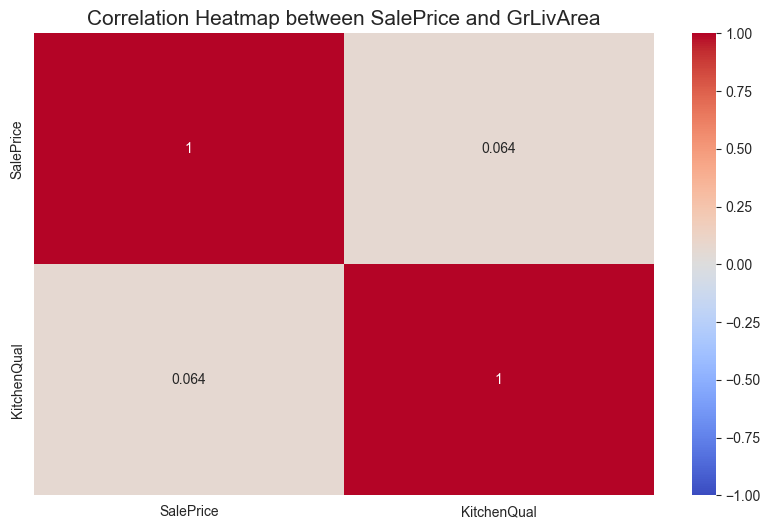

In [2]:
#Chargement du fichier train.csv
X_full = pd.read_csv('data/test_data.csv')

#Sélection directe des colonnes demandées
X_full = X_full[['Id','LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'GrLivArea',
                 'FullBath', 'BedroomAbvGr', 'KitchenQual', 'GarageCars', 'GarageArea', 'MoSold']]

#Mapping des valeurs de KitchenQual
kitchen_qual_map = {'Ex': 3, 'Gd': 2, 'TA': 1, 'Fa': 0}
X_full['KitchenQual'] = X_full['KitchenQual'].map(kitchen_qual_map)

#Vérifier s'il y a des valeurs manquantes dans KitchenQual après la conversion
print("Valeurs manquantes dans KitchenQual après conversion :", X_full['KitchenQual'].isna().sum())

#Si des valeurs manquantes existent dans KitchenQual, les remplacer par la médiane
if X_full['KitchenQual'].isna().sum() > 0:
    X_full['KitchenQual'].fillna(X_full['KitchenQual'].median(), inplace=True)

X_full.to_csv('test_full.csv', index=False)

#Chargement des fichiers CSV
test_df = pd.read_csv('data/test_full.csv')
sample_submission_df = pd.read_csv('data/sample_submission.csv')

#Fusionner les deux DataFrames sur la colonne 'Id'
merged_df = pd.merge(test_df, sample_submission_df, on='Id')

#Sauvegarder le résultat dans un nouveau fichier CSV
merged_df.to_csv('merged_data.csv', index=False)

print(merged_df.head())  # Afficher les premières lignes du DataFrame fusionné
fig, ax = plt.subplots(1,1, figsize=(10, 6))

correlation = merged_df[['SalePrice', 'KitchenQual']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, ax=ax)

ax.set_title('Correlation Heatmap between SalePrice and GrLivArea', fontsize=15)

plt.show()